In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd
import numpy as np


In [2]:

 
url = 'https://ticker.finology.in/company/RELIANCE'  # Replace this with the target website URL
 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
}
 
response = requests.get(url, headers=headers)
 
if response.status_code == 200:
    print(response.text)  # Print the content of the response
else:
    print(f'Request failed with status code: {response.status_code}')




<!DOCTYPE html>
<html>
<head>
    <!-- Global site tag (gtag.js) - Google Analytics -->
    <script async src="https://www.googletagmanager.com/gtag/js?id=UA-136614031-6"></script>
    <script>
        window.dataLayer = window.dataLayer || [];
        function gtag() { dataLayer.push(arguments); }
        gtag('js', new Date());
        gtag('config', 'UA-136614031-6');
    </script>

    <title>
	Reliance Industries Ltd. Share Price Today, Market Cap, Price Chart, Balance Sheet
</title><meta charset="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no" /><link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css" integrity="sha384-Vkoo8x4CGsO3+Hhxv8T/Q5PaXtkKtu6ug5TOeNV6gBiFeWPGFN9MuhOf23Q9Ifjh" crossorigin="anonymous" /><link href="https://fonts.googleapis.com/css?family=Hind:300,400,500,600,700|Source+Sans+Pro:400,600,700" rel="stylesheet" />
    <script src="https://cdnjs.cloudflare.com/ajax/lib

In [3]:
data_extracted = BeautifulSoup(response.text, 'html.parser')

In [4]:
text = data_extracted.find("div",{"class": "innerpagecontent"}).find("div", {"id": "mainContent_divCompanyEssentials"}).text

In [5]:

# Use regular expressions to extract relevant information
market_cap = re.search(r'Market Cap[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
enterprise_value = re.search(r'Enterprise Value[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
no_of_shares = re.search(r'No. of Shares[\s\S]*?([\d.]+) Cr.', text).group(1)
pe_ratio = re.search(r'P/E[\s\S]*?([\d.]+)', text).group(1)
pb_ratio = re.search(r'P/B[\s\S]*?([\d.]+)', text).group(1)
face_value = re.search(r'Face Value[\s\S]*?₹ (\d+)', text).group(1)
div_yield = re.search(r'Div. Yield[\s\S]*?([\d.]+) %', text).group(1)
book_value = re.search(r'Book Value \(TTM\)[\s\S]*?₹ ([\d.]+)', text).group(1)
cash = re.search(r'CASH[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
debt = re.search(r'DEBT[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
promoter_holding = re.search(r'Promoter Holding[\s\S]*?(\d+) %', text).group(1)

sales_growth = re.search(r'Sales Growth[\s\S]*?([\d.]+)%', text).group(1)
roe = re.search(r'ROE[\s\S]*?([\d.]+) %', text).group(1)
roce = re.search(r'ROCE[\s\S]*?([\d.]+)%', text).group(1)

# Print or format the extracted information

print(f"Market Cap: ₹ {market_cap} Cr.")
print(f"Enterprise Value: ₹ {enterprise_value} Cr.")
print(f"No. of Shares: {no_of_shares} Cr.")
print(f"P/E Ratio: {pe_ratio}")
print(f"P/B Ratio: {pb_ratio}")
print(f"Face Value: ₹ {face_value}")
print(f"Div. Yield: {div_yield}%")
print(f"Book Value (TTM): ₹ {book_value}")
print(f"Cash: ₹ {cash} Cr.")
print(f"Debt: ₹ {debt} Cr.")
print(f"Sales Growth: {sales_growth}%")
print(f"ROE: {roe}%")
print(f"ROCE: {roce}%")


Market Cap: ₹ 1620009.48 Cr.
Enterprise Value: ₹ 1779021.48 Cr.
No. of Shares: 676.61 Cr.
P/E Ratio: 37.56
P/B Ratio: 3.28
Face Value: ₹ 10
Div. Yield: 50.27%
Book Value (TTM): ₹ 56811
Cash: ₹ 56811 Cr.
Debt: ₹ 215823 Cr.
Sales Growth: 25.1%
ROE: 9.05%
ROCE: 9.81%


In [20]:
# giving basic information about the company
def company_basics(companuy):
    url = 'https://ticker.finology.in/company/RELIANCE'
    data_dict = {}
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        market_cap = re.search(r'Market Cap[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
        enterprise_value = re.search(r'Enterprise Value[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
        no_of_shares = re.search(r'No. of Shares[\s\S]*?([\d.]+) Cr.', text).group(1)
        pe_ratio = re.search(r'P/E[\s\S]*?([\d.]+)', text).group(1)
        pb_ratio = re.search(r'P/B[\s\S]*?([\d.]+)', text).group(1)
        face_value = re.search(r'Face Value[\s\S]*?₹ (\d+)', text).group(1)
        div_yield = re.search(r'Div. Yield[\s\S]*?([\d.]+) %', text).group(1)
        book_value = re.search(r'Book Value \(TTM\)[\s\S]*?₹ ([\d.]+)', text).group(1)
        cash = re.search(r'CASH[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
        debt = re.search(r'DEBT[\s\S]*?₹ ([\d.]+) Cr.', text).group(1)
        promoter_holding = re.search(r'Promoter Holding[\s\S]*?(\d+) %', text).group(1)
        sales_growth = re.search(r'Sales Growth[\s\S]*?([\d.]+)%', text).group(1)
        roe = re.search(r'ROE[\s\S]*?([\d.]+) %', text).group(1)
        roce = re.search(r'ROCE[\s\S]*?([\d.]+)%', text).group(1)
        data_dict = {'market_cap(in Cr.)':market_cap,'enterprise_value (    in Cr.)':enterprise_value,'no_of_shares (in Cr.)':no_of_shares,'pe_ratio':pe_ratio,'pb_ratio':pb_ratio,
                     'face_value':face_value,'div_yield':div_yield,'book_value (in Rs.)':book_value,'cash(in Cr.)':cash,'debt (in Cr.)':debt,'promoter_holding(%)':promoter_holding,'sales_growth(%)':sales_growth,'roe(%)':roe,'roce(%)':roce}
        alfa = pd.DataFrame(data_dict)
        return alfa

        
    else:
        print(f'Request failed with status code: {response.status_code}')
    

<h1> qutarley result </h1>

In [21]:

 
url = 'https://ticker.finology.in/company/RELIANCE'  # Replace this with the target website URL
 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
}
 
response = requests.get(url, headers=headers)
 
if response.status_code == 200:
    print(response.text)  # Print the content of the response
else:
    print(f'Request failed with status code: {response.status_code}')



<!DOCTYPE html>
<html>
<head>
    <!-- Global site tag (gtag.js) - Google Analytics -->
    <script async src="https://www.googletagmanager.com/gtag/js?id=UA-136614031-6"></script>
    <script>
        window.dataLayer = window.dataLayer || [];
        function gtag() { dataLayer.push(arguments); }
        gtag('js', new Date());
        gtag('config', 'UA-136614031-6');
    </script>

    <title>
	Reliance Industries Ltd. Share Price Today, Market Cap, Price Chart, Balance Sheet
</title><meta charset="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no" /><link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css" integrity="sha384-Vkoo8x4CGsO3+Hhxv8T/Q5PaXtkKtu6ug5TOeNV6gBiFeWPGFN9MuhOf23Q9Ifjh" crossorigin="anonymous" /><link href="https://fonts.googleapis.com/css?family=Hind:300,400,500,600,700|Source+Sans+Pro:400,600,700" rel="stylesheet" />
    <script src="https://cdnjs.cloudflare.com/ajax/lib

In [22]:
data = BeautifulSoup(response.text, 'html.parser')


In [26]:
data_extracted = data.find("div",{"class": "innerpagecontent"}).find("div", {"id": "mainContent_quarterly"})\
.find("div", {"class": "col-12"}).find("div",{"class": "card cardscreen"}).find("table")
data_extracted

<table class="table table-sm table-hover screenertable table-responsive-sm">
<thead>
<tr>
<th scope="col">PARTICULARS</th>
<th scope="col">Sep 2022</th>
<th scope="col">Dec 2022</th>
<th scope="col">Mar 2023</th>
<th scope="col">Jun 2023</th>
<th scope="col">Sep 2023</th>
</tr>
</thead>
<tbody>
<tr class="">
<th scope="row">Net Sales <span class="infolink" data-tooltip="tooltip" title="It is companys core revenue net of discounts and returns."><i class="fas fa-info-circle"></i></span></th>
<td>
<span class="Number">
                                                    140154
                                                </span>
</td>
<td>
<span class="Number">
                                                    129415
                                                </span>
</td>
<td>
<span class="Number">
                                                    122133
                                                </span>
</td>
<td>
<span class="Number">
                                  

In [29]:
x = data_extracted.find_all("th")
rows = []
col = []
for i in x:
    alfa = i.get("scope")
    if(alfa == "col"):

        col.append(i.text)
    else:
        rows.append(i.text)



In [41]:
len(rows)

11

In [56]:
x_data = data_extracted.find_all("td")
alfa = []
temp_file = []
for i in x_data:

    temp_text = i.text
    temp_file.append(float(temp_text.strip()))
    if(len(temp_file) == 5):
        alfa.append(temp_file)
        temp_file = []

    

In [57]:
alfa

[[140154.0, 129415.0, 122133.0, 120408.0, 140450.0],
 [128369.0, 114381.0, 104063.0, 104047.0, 121259.0],
 [11785.0, 15034.0, 18070.0, 16361.0, 19191.0],
 [3334.0, 2579.0, 2785.0, 2895.0, 2934.0],
 [2916.0, 3349.0, 3745.0, 3596.0, 3239.0],
 [2611.0, 2532.0, 2734.0, 2819.0, 4384.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [9592.0, 11732.0, 14376.0, 12841.0, 14502.0],
 [2842.0, 3359.0, 555.0, 3115.0, 3294.0],
 [6750.0, 8373.0, 13821.0, 9726.0, 11208.0],
 [9.98, 12.38, 20.43, 14.37, 16.57]]

In [58]:
rows

['Net Sales ',
 'Total Expenditure ',
 'Operating Profit ',
 'Other Income ',
 'Interest ',
 'Depreciation ',
 'Exceptional Items ',
 'Profit Before Tax ',
 'Tax ',
 'Profit After Tax ',
 'Adjusted EPS (Rs) ']

In [59]:
col

['PARTICULARS', 'Sep 2022', 'Dec 2022', 'Mar 2023', 'Jun 2023', 'Sep 2023']

In [60]:
# creating a dummy dataframe
dummy = pd.DataFrame(alfa,columns=col[1:], index =rows)
dummy

,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023
Net Sales,140154.00,129415.00,122133.00,120408.00,140450.00
Total Expenditure,128369.00,114381.00,104063.00,104047.00,121259.00
Operating Profit,11785.00,15034.00,18070.00,16361.00,19191.00
Other Income,3334.00,2579.00,2785.00,2895.00,2934.00
Interest,2916.00,3349.00,3745.00,3596.00,3239.00
Depreciation,2611.00,2532.00,2734.00,2819.00,4384.00
Exceptional Items,0.00,0.00,0.00,0.00,0.00
Profit Before Tax,9592.00,11732.00,14376.00,12841.00,14502.00
Tax,2842.00,3359.00,555.00,3115.00,3294.00
Profit After Tax,6750.00,8373.00,13821.00,9726.00,11208.00


In [61]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Net Sales  to Adjusted EPS (Rs) 
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sep 2022  11 non-null     float64
 1   Dec 2022  11 non-null     float64
 2   Mar 2023  11 non-null     float64
 3   Jun 2023  11 non-null     float64
 4   Sep 2023  11 non-null     float64
dtypes: float64(5)
memory usage: 528.0+ bytes


<h1> Final Function </h1>

In [63]:
def quarterly_financials(company):
    url = 'https://ticker.finology.in/company/{}'.format(company)  # Replace this with the target website URL
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)
    if(response.status_code == 200):
        data = BeautifulSoup(response.text, 'html.parser')
        data_extracted = data.find("div",{"class": "innerpagecontent"}).find("div", {"id": "mainContent_quarterly"})\
            .find("div", {"class": "col-12"}).find("div",{"class": "card cardscreen"}).find("table")
        # extracted rows 
        rows = ['Net Sales ','Total Expenditure ','Operating Profit ','Other Income ','Interest ','Depreciation ','Exceptional Items ','Profit Before Tax ','Tax ',
                'Profit After Tax ','Adjusted EPS (Rs) ']
        cols = [ 'Sep 2022', 'Dec 2022', 'Mar 2023', 'Jun 2023', 'Sep 2023']
        # main data
        x_data = data_extracted.find_all("td")
        alfa = []
        temp_file = []
        for i in x_data:
            temp_text = i.text
            temp_file.append(float(temp_text.strip()))
            if(len(temp_file) == 5):
                alfa.append(temp_file)
                temp_file = []
        dummy = pd.DataFrame(alfa,columns=cols, index =rows)
        return dummy
        
        
        
    else:
        print("Request failed with status code: {}".format(response.status_code))

In [64]:
quarterly_financials("RELIANCE")

,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023
Net Sales,140154.00,129415.00,122133.00,120408.00,140450.00
Total Expenditure,128369.00,114381.00,104063.00,104047.00,121259.00
Operating Profit,11785.00,15034.00,18070.00,16361.00,19191.00
Other Income,3334.00,2579.00,2785.00,2895.00,2934.00
Interest,2916.00,3349.00,3745.00,3596.00,3239.00
Depreciation,2611.00,2532.00,2734.00,2819.00,4384.00
Exceptional Items,0.00,0.00,0.00,0.00,0.00
Profit Before Tax,9592.00,11732.00,14376.00,12841.00,14502.00
Tax,2842.00,3359.00,555.00,3115.00,3294.00
Profit After Tax,6750.00,8373.00,13821.00,9726.00,11208.00


In [71]:
alfa_dummy = dummy.T

In [76]:
alfa_dummy.columns

Index(['Net Sales ', 'Total Expenditure ', 'Operating Profit ',
       'Other Income ', 'Interest ', 'Depreciation ', 'Exceptional Items ',
       'Profit Before Tax ', 'Tax ', 'Profit After Tax ',
       'Adjusted EPS (Rs) '],
      dtype='object')

<Axes: >

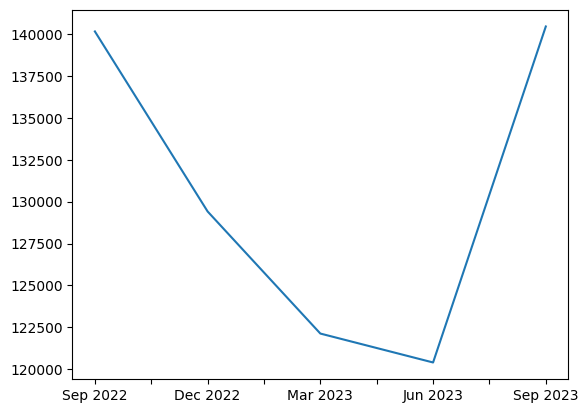

In [78]:
alfa_dummy['Net Sales '].plot()

<h1> balance sheet data </h1>

In [79]:

 
url = 'https://ticker.finology.in/company/RELIANCE'  # Replace this with the target website URL
 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
}
 
response = requests.get(url, headers=headers)
 
if response.status_code == 200:
    print(response.text)  # Print the content of the response
else:
    print(f'Request failed with status code: {response.status_code}')



<!DOCTYPE html>
<html>
<head>
    <!-- Global site tag (gtag.js) - Google Analytics -->
    <script async src="https://www.googletagmanager.com/gtag/js?id=UA-136614031-6"></script>
    <script>
        window.dataLayer = window.dataLayer || [];
        function gtag() { dataLayer.push(arguments); }
        gtag('js', new Date());
        gtag('config', 'UA-136614031-6');
    </script>

    <title>
	Reliance Industries Ltd. Share Price Today, Market Cap, Price Chart, Balance Sheet
</title><meta charset="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no" /><link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css" integrity="sha384-Vkoo8x4CGsO3+Hhxv8T/Q5PaXtkKtu6ug5TOeNV6gBiFeWPGFN9MuhOf23Q9Ifjh" crossorigin="anonymous" /><link href="https://fonts.googleapis.com/css?family=Hind:300,400,500,600,700|Source+Sans+Pro:400,600,700" rel="stylesheet" />
    <script src="https://cdnjs.cloudflare.com/ajax/lib

In [93]:
data = BeautifulSoup(response.text, 'html.parser')
data_extracted = data.find("div",{"class": "innerpagecontent"}).find("div", {"id": "balance"}).find("table")
th_data = data_extracted.find_all("th")
rows = []
cols = []
for i in th_data:
    temp_data = i.get("scope")
    if(temp_data == "col"):
        cols.append(i.text)
    else:
        rows.append(i.text)
rows

['Equity and Liabilities',
 'Share Capital ',
 'Total Reserves ',
 'Borrowings ',
 'Other N/C liabilities ',
 'Current liabilities ',
 'Total Liabilities ',
 'Assets',
 'Net Block ',
 'Capital WIP ',
 'Intangible WIP ',
 'Investments ',
 'Loans & Advances ',
 'Other N/C Assets ',
 'Current Assets ',
 'Total Assets ']

In [94]:
cols

['Particulars', 'Mar 2019', 'Mar 2020', 'Mar 2021', 'Mar 2022', 'Mar 2023']

In [107]:
def balance_sheet(company):
    url = 'https://ticker.finology.in/company/{}'.format(company)  # Replace this with the target website URL
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)
    if(response.status_code == 200):
        data = BeautifulSoup(response.text, 'html.parser')
        data_extracted = data_extracted = data.find("div",{"class": "innerpagecontent"}).find("div", {"id": "balance"}).find("table")
        # extracted rows 
        rows = ['Share Capital ','Total Reserves ','Borrowings ',
                'Other N/C liabilities ','Current liabilities ','Total Liabilities ','Net Block ','Capital WIP ',
                'Intangible WIP ','Investments ','Loans & Advances ','Other N/C Assets ','Current Assets ','Total Assets ']
        cols = [  'Mar 2019', 'Mar 2020', 'Mar 2021', 'Mar 2022', 'Mar 2023']
        # main data
        x_data = data_extracted.find_all("td")
        alfa = []
        temp_file = []
        for i in x_data:
            temp_text = i.text
            temp_text = temp_text.strip()

            print(temp_text)
            if(temp_text != ''):
                temp_file.append(temp_text)
            if(len(temp_file) == 5):
                alfa.append(temp_file)
                temp_file = []

        print(alfa)
        dummy = pd.DataFrame(alfa,columns=cols, index =rows)
        return dummy
        
        
        
    else:
        print("Request failed with status code: {}".format(response.status_code))

In [108]:
balance_sheet("RELIANCE")






6339
6339
6445
6765
6766
398983
384876
468038
464762
472328
118098
194402
160598
167231
135561
59744
62600
38313
39721
45071
202021
330682
201787
200982
237276
785185
978899
875181
879461
897002





203188
306478
306833
239626
245164
105155
15638
20765
19267
30958
6402
12327
12070
15395
17957
272043
421793
252620
330493
303558
44335
55978
71203
50568
31735
1198
31
971
1714
1698
152864
166654
210719
222398
265932
785185
978899
875181
879461
897002
[['6339', '6339', '6445', '6765', '6766'], ['398983', '384876', '468038', '464762', '472328'], ['118098', '194402', '160598', '167231', '135561'], ['59744', '62600', '38313', '39721', '45071'], ['202021', '330682', '201787', '200982', '237276'], ['785185', '978899', '875181', '879461', '897002'], ['203188', '306478', '306833', '239626', '245164'], ['105155', '15638', '20765', '19267', '30958'], ['6402', '12327', '12070', '15395', '17957'], ['272043', '421793', '252620', '330493', '303558'], ['44335', '55978', '71203', '50568', '31735'], 

,Mar 2019,Mar 2020,Mar 2021,Mar 2022,Mar 2023
Share Capital,6339,6339,6445,6765,6766
Total Reserves,398983,384876,468038,464762,472328
Borrowings,118098,194402,160598,167231,135561
Other N/C liabilities,59744,62600,38313,39721,45071
Current liabilities,202021,330682,201787,200982,237276
Total Liabilities,785185,978899,875181,879461,897002
Net Block,203188,306478,306833,239626,245164
Capital WIP,105155,15638,20765,19267,30958
Intangible WIP,6402,12327,12070,15395,17957
Investments,272043,421793,252620,330493,303558
